In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

In [77]:
n_samples = 500
n_centers = 5
k = 3

(2, 500)

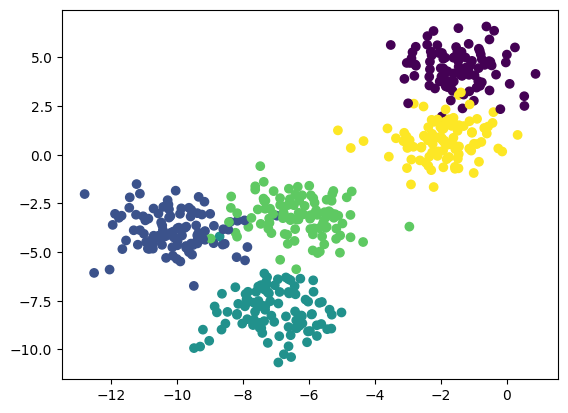

In [78]:
X, y = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=1, random_state=1)
X = X.T

X.shape
_ = plt.scatter(*X, c=y)

## full algo

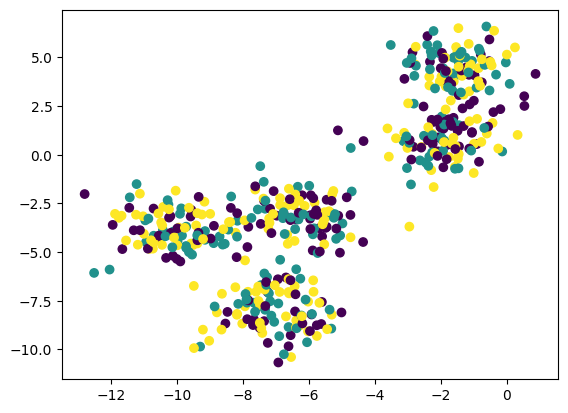

Iteration 1


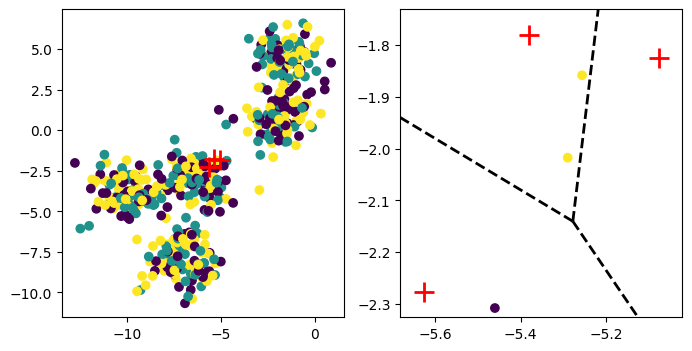

Iteration 2


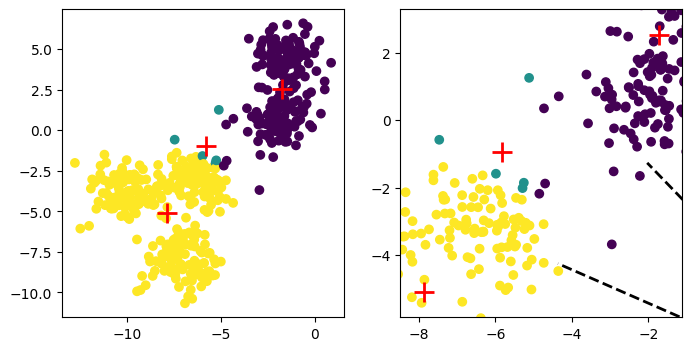

Iteration 3


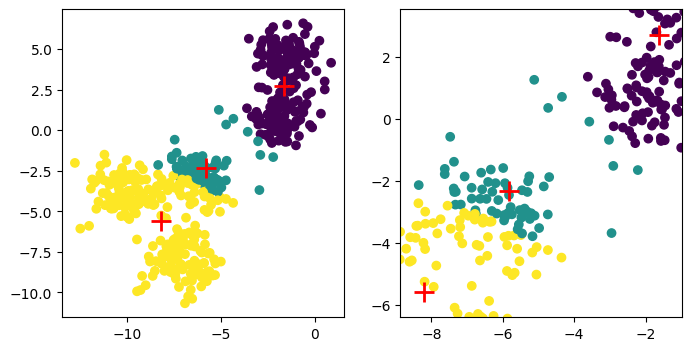

Iteration 4


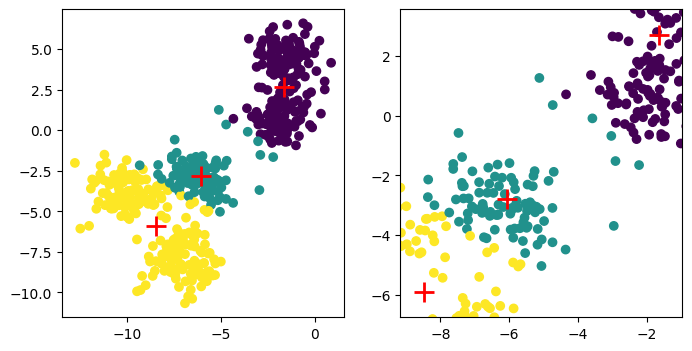

Iteration 5


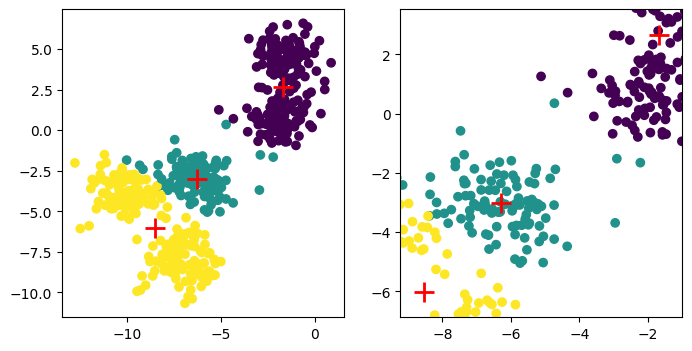

Iteration 6


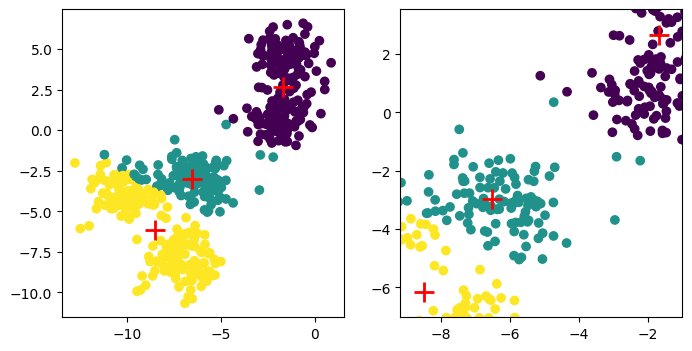

Iteration 7


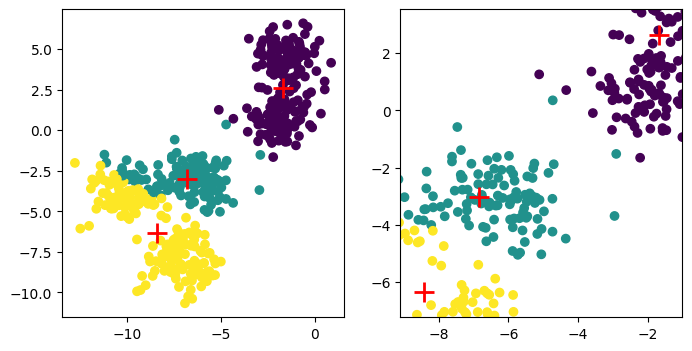

Iteration 8


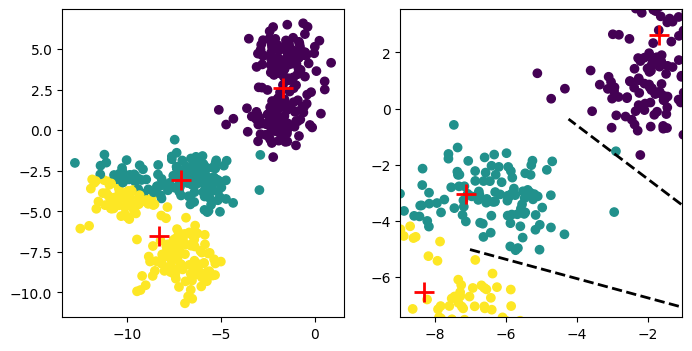

Iteration 9


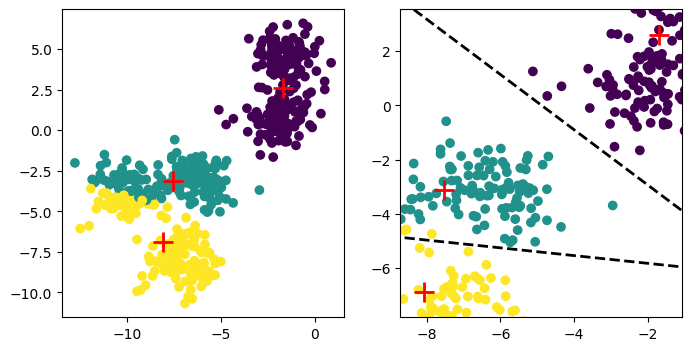

Iteration 10


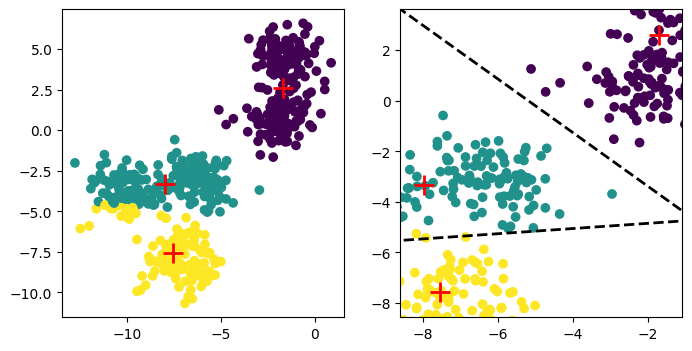

Iteration 11


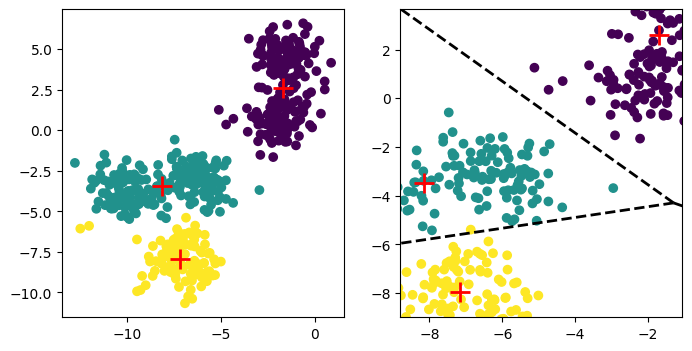

Iteration 12


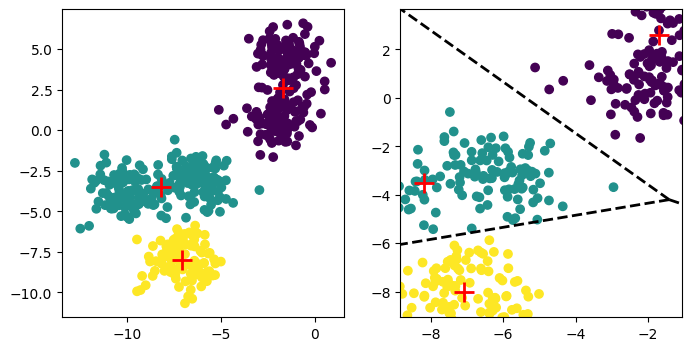

In [79]:
# initial cluster assignment
cluster_assignments = np.random.randint(k, size=n_samples)
_ = plt.scatter(*X, c=cluster_assignments)
plt.show()

# initialize centers
centers = np.zeros((2, k))

t = 1
while True:
  print(f"Iteration {t}")

  # compute centers
  for k_ in range(k):
    sample_indices = np.where(cluster_assignments == k_)[0]
    if sample_indices.size == 0:
      continue  # skip if no samples in this cluster
    samples = X[:, sample_indices]
    center = samples.mean(axis=1)
    centers[:, k_] = center

  _ = plt.figure(figsize=(8, 4))
  _ = plt.subplot(1, 2, 1)
  _ = plt.scatter(*X, c=cluster_assignments)
  _ = plt.scatter(*centers, c='r', marker='+', s=200, linewidths=2)

  _ = plt.subplot(1, 2, 2)
  _ = plt.scatter(*X, c=cluster_assignments)
  _ = voronoi_plot_2d(Voronoi(centers.T), ax=plt.gca(), show_vertices=False, show_points=False, line_width=2)
  _ = plt.scatter(*centers, c='r', marker='+', s=200, linewidths=2)

  # reassign clusters
  reassigned = False
  for i in range(n_samples):
    sample = X[:, i].reshape(-1, 1)
    old_cluster = cluster_assignments[i]
    new_cluster = np.argmin(np.linalg.norm(centers - sample, axis=0))
    if old_cluster != new_cluster:
      cluster_assignments[i] = new_cluster
      reassigned = True

  if not reassigned:
    break
  t += 1
  plt.show()